## Project: Bank Analysis - Tweets 
Using Twint to scrape tweets 

Use beautiful soup to clean tweets with WordPunctTokenizer


# Quick Twint code
Github - https://github.com/twintproject/twint

All functions - https://github.com/twintproject/twint/wiki/Configuration
### setup 
c.twint.Config() 

#### set username
c.Username = "realDonaldTrump"

#### set phrase search
c.Search = "great"

#### customise output
c.Custom["tweet"] = ["id"]           --- assign column names

c.Custom["user"] = ["bio"]

c.Limit = 1                          ---- limit to batches (unknown size)

c.Since = "2019–04–29"

c.Until = "2020–04–29"

#### Pandas 
c.Pandas = True

    --------once run save to dataframe
    
    ---- Tweets 
    df = twint.storage.panda.Tweets_df
    
    ---- followers 
    df = twint.storage.panda.Follow_df
    
    df = Followers_df['followers'][username]

#### Write output 
c.Store_csv = True

c.Output = "test.csv"

### Execute determines how its run- using setup above
twint.run.Search(c)    --- will run search for all tweets with the above

twint.run.Profile(c)   ---- will run against profile - return only this profiles tweets

twint.run.Followers(c) ---- get follower info 


config.Since = "2019–04–29"\
config.Until = "2020–04–29"\
config.Store_json = True


In [1]:

import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()            #for compatibility issues 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import seaborn as sns

#cleaning
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

# NLP
from textblob import TextBlob
#from IPython.display import Markdown, display

#word cloud and stopwords
from wordcloud import WordCloud, STOPWORDS

### Configure and run Twint (twitter scrapper)

In [2]:
#stdBankString = "StandardBankZA OR \"Standard Bank\""
#NB_String = "FNBSA"

since = "2021-08-10"

def twintRun(date_from,search_string):    
    c = twint.Config()
    c.Search = search_string
    c.Pandas = True
    c.Since = date_from
    #c.Until = "2021-07-30"
    twint.run.Search(c)

### Run twint

In [3]:
bank_dic = {"FNB":"FNBSA", "StandardBank":"StandardBankZA OR \"Standard Bank\""}
since = "2021-08-18"

def Run_Twint(search_dic):
    Final_df= pd.DataFrame()
    
    for b in search_dic.items():
        print ("running: "+b[1]+"\n")
        
        #run twint
        twintRun(since,b[1])
        
        #get dataframe
        tweets_df = twint.storage.panda.Tweets_df
        
        #join Dataframes
        tweets_df["Bank"]= b[0]
        Final_df = pd.concat([Final_df,tweets_df])
    return Final_df

In [4]:
tweets_df = Run_Twint(bank_dic)

running: FNBSA

1428370892929781760 2021-08-19 16:58:53 +0200 <melliss23623871> @FNBSA #LoveFNB
1428370186432917507 2021-08-19 16:56:04 +0200 <LareceRandall> @Rbjacobs @FNBSA Kindly check DM.
1428369765098131468 2021-08-19 16:54:24 +0200 <Yvettevanderbe1> @FNBSA #LoveFNB Its exciting to pay off me debt faster
1428368010595561482 2021-08-19 16:47:26 +0200 <precious_pulley> @FNBSA @p___misa I nominate myself ...  #LoveFNB  (Pinned tweet)
1428367914747326477 2021-08-19 16:47:03 +0200 <SuzzieMN> @FNBSA My daughter, she sells Atchar and vegetables. #LoveFNB
1428366655160131585 2021-08-19 16:42:03 +0200 <ThahThah19> @FNBSA #LoveFNB  My long-term goal is to finish my studies and open my own registered practice as a physiotherapist
1428366642107408395 2021-08-19 16:41:59 +0200 <PrimroseXuza> @FNBSA please plea I didn't take a loan from you.stop sending me messages
1428366260216025094 2021-08-19 16:40:28 +0200 <NompumeleloJea3> @FNBSA @DJZinhle this woman is doing the most in the business indus

1428353991142903812 2021-08-19 15:51:43 +0200 <ntshinye> @FNBSA @sarahmfandu  for all your makeup and beauty #LoveFNB
1428353904438235136 2021-08-19 15:51:23 +0200 <ntshinye> @FNBSA @ntshinye  She fixes electrical appliances free around the community  #LoveFNB  https://t.co/c3Qt2OgJKD
1428353525759680516 2021-08-19 15:49:52 +0200 <ntshinye> @FNBSA @KKhumelo  She cookies yummy cookies and fat cakes  #LoveFNB
1428353152231755779 2021-08-19 15:48:23 +0200 <CGFResearch> It takes 20 years to build the brand and #reputation of an organisation, it takes 1 minute to destroy it!  An Open Letter to Jacques Cilliers - Goodbye @FNBSA    https://t.co/Vtg3eHI6sQ via @RJThomas
1428353054819045381 2021-08-19 15:48:00 +0200 <DenverBooysen11> @FNBSA A house for my kids #LoveFNB
1428352888217030657 2021-08-19 15:47:20 +0200 <ntshinye> @FNBSA @TintswaloN3  She makes satin bonnets for all natural hair Queens at such an affordable price. #LoveFNB
1428352379770994697 2021-08-19 15:45:19 +0200 <Waydeepregnola

1428337091646267393 2021-08-19 14:44:34 +0200 <MNgwebedla> @FNBSA #LoveFNB
1428337011556028420 2021-08-19 14:44:15 +0200 <phat_siiFashion> @FNBSA Invest in my education #LoveFNB
1428336948788273154 2021-08-19 14:44:00 +0200 <amggg06> @FNBSA #LoveFNB
1428336940236124161 2021-08-19 14:43:58 +0200 <MNgwebedla> @FNBSA Erecting a tombstone #LoveFNB
1428336768206659586 2021-08-19 14:43:17 +0200 <Iamtiaantjie> @FNBSA #LoveFNB
1428336632743202821 2021-08-19 14:42:45 +0200 <Mbalee__Omuhle> @FNBSA #LoveFNB
1428336608642752515 2021-08-19 14:42:39 +0200 <Phat_Sii> @FNBSA Being Debt free #LoveFNB
1428336577609076737 2021-08-19 14:42:31 +0200 <Mama_Ontetlile> @FNBSA Building a home for my family. #LoveFNB
1428336577462276097 2021-08-19 14:42:31 +0200 <LRMarota> @FNBSA #LoveFNB
1428336419970457610 2021-08-19 14:41:54 +0200 <doc_comedy> 530 per month @FNBSA #premier banking and I have to go to branch to get a statement and take it to Fnb lawyers. So much for technology @FNBSA
1428336382402043906 2021-

1428330125075038212 2021-08-19 14:16:53 +0200 <SharonUyanda> @Siphesi17525359 @FNBSA Thank you so much😊🙏
1428330094704173057 2021-08-19 14:16:46 +0200 <SandraS09072829> @FNBSA Definitely @MargaretHirsch She's phenomenal and always uplifting other women. Such a brilliant and inspirational business woman #LoveFNB
1428329815199948807 2021-08-19 14:15:39 +0200 <Aya_Mpofu1> @FNBSA I have a small business where I make handmade crochet custom items, from Crochet tops, earrings and hats. I believe that with time and effort I will be able to grow my business and will be able to create job opportunities for unemployed people. #LoveFNB  https://t.co/7fK1HXY36E
1428328872005754883 2021-08-19 14:11:54 +0200 <TidimaloF> @FNBSA @bokamoso_mokone Congratulations
1428328510641295364 2021-08-19 14:10:28 +0200 <TumiKeBoss_> @FNBSA will scam you guys they scam me and they can’t help me.  #fnbmustfall
1428328455544971264 2021-08-19 14:10:15 +0200 <Gugu_Miss_B> @FNBSA DJ zinhle business from watches to her h

1428322124918366211 2021-08-19 13:45:06 +0200 <Nthabisengmg24> @FNBSA @MapasekaML  she's a nail technician and offers the best service @biskitcosmetics has her own cosmetic brand and I love it #LoveFNB @FNBSA
1428321982416887813 2021-08-19 13:44:32 +0200 <SeamogeloG> @VendaVendor @FNBSA  https://t.co/TkQ2lMlqZ1
1428321131791097856 2021-08-19 13:41:09 +0200 <CelinaNkuna> I nominate @FunoDesigns  the founder of Funo Designs, a brand that creatively designs and handcrafts modern traditional shoes for women from all cultural backgrounds who love cultural fashion. #LoveFNB @FNBSA
1428321038614548480 2021-08-19 13:40:47 +0200 <CelinaNkuna> @FNBSA I nominate @FunoDesigns  the founder of Funo Designs, a brand that creatively designs and handcrafts modern traditional shoes for women from all cultural backgrounds who love cultural fashion. #LoveFNB
1428320939230568453 2021-08-19 13:40:23 +0200 <tbangsatoo> @Nam_2206 @FNBSA @Discovery_SA I just signed up for Discovery as well. I'm really not gett

1428310565227835395 2021-08-19 12:59:10 +0200 <TThobho> @FNBSA #LoveFNB
1428310549440471043 2021-08-19 12:59:06 +0200 <Nkoskodollar1> @FNBSA My cousin Molebogeng is fixing cars and it is always odd when a lady fixes cars 😉. She is a pro. Power to her. #LoveFNB
1428310527248412675 2021-08-19 12:59:01 +0200 <VendaVendor> Hi @FNBSA,  Can you finance a portion of a house? I just want one room nje not the whole house. Can that work?
1428310479366197248 2021-08-19 12:58:49 +0200 <Nkoskodollar1> @FNBSA #LoveFNB
1428310453214748675 2021-08-19 12:58:43 +0200 <Nkoskodollar1> @FNBSA #LoveFNB
1428310424957620224 2021-08-19 12:58:36 +0200 <Nkoskodollar1> @FNBSA #LoveFNB
1428310402551668739 2021-08-19 12:58:31 +0200 <Nkoskodollar1> @FNBSA #LoveFNB
1428310367197929474 2021-08-19 12:58:22 +0200 <Nkoskodollar1> @FNBSA My cousin Molebogeng is fixing cars and it is always odd when a lady fixes cars 😉. She is a pro. Power to her. #LoveFNB
1428310335874904068 2021-08-19 12:58:15 +0200 <Nkoskodollar1> @FNBS

1428302191136235523 2021-08-19 12:25:53 +0200 <ChivellL> @FNBSA My sister in law @ijschivell she bakes and sells cakes from home.She is doing well for herself.#LoveFNB .
1428302144025866241 2021-08-19 12:25:42 +0200 <RamolefaneBenny> @FNBSA Inspired by @Brillia20778497 she runs a hair dressing salon #LoveFNB
1428302117744349191 2021-08-19 12:25:36 +0200 <Revovo_ZA> @RBanksMustFall @FNBSA @AbsaSouthAfrica And that 75% is through corruption #BanksClassAction
1428302117173964802 2021-08-19 12:25:35 +0200 <VellyMoagi> @FNBSA @suzan_letsoalo. She wakes up every morning to sell the scones at our nearest town. The business is going very well and she is able to take a good care of her kids. #LoveFNB
1428302080360521728 2021-08-19 12:25:27 +0200 <Simon45389510> @FNBSA My mom tailored business #LoveFNB
1428302040678211584 2021-08-19 12:25:17 +0200 <ChivellL> @FNBSA My sister in law @ijschivell she bakes and sells cakes from home.She is doing well for herself.. #lovefnb
1428301986051526656 2021-0

1428288694893547528 2021-08-19 11:32:15 +0200 <Tezisto> @FNBSA #LoveFNB #FemaleOwned   @BravoPromotionz is a BTL marketing agency, specializing in communicating a variety of msgs to targeted audiences. Extensive research results in a successful campaign; from conception to implementation. Employing the right people to represent your brand.
1428288693941460999 2021-08-19 11:32:15 +0200 <adorable_chezz> @FNBSA #LoveFNB
1428288623762452483 2021-08-19 11:31:58 +0200 <Jay88825361> @FNBSA Really?
1428288333310988289 2021-08-19 11:30:49 +0200 <AlfredSpiver> @FNBSA @MargaretHirsch Because she is a strong woman who is not afraid of hard work, she is loving and always willing to help where she can and that is why her bussiness is so successful #LoveFNB
1428287934789263362 2021-08-19 11:29:14 +0200 <Amanda032391651> @FNBSA #LoveFnb
1428287887129387008 2021-08-19 11:29:03 +0200 <WendyAnneBok> @FNBSA #LoveFNB
1428287833819734019 2021-08-19 11:28:50 +0200 <Amanda032391651> @FNBSA I would be tagging 

1428278001599451136 2021-08-19 10:49:46 +0200 <Hm9Safe> @FNBSA #LoveFNB
1428277980418252800 2021-08-19 10:49:41 +0200 <Nelisiwekhoza8> @FNBSA @PearlBongie started selling fatcakes and ginger to students and lectures and now she has a container growing her business everyday  https://t.co/z1lftsXk9k
1428277888525258752 2021-08-19 10:49:19 +0200 <Cool_E_> @skopas7 @FNBSA We will talk about this on Sunday.
1428277841834254338 2021-08-19 10:49:08 +0200 <Mimie_101> @FNBSA #LoveFNB education is the key to a better future....I want a degree b4 my daughter so she can be proud if mommy also.
1428277628012843008 2021-08-19 10:48:17 +0200 <Mnquru> Welcome to @FNBSA, Aliwal-North branch, where you have one consultant attending to walk in clients , 3 floor supervisors asking clients ticket numbers... More client's on waiting area🤣🤣🤣🤣 Worse than #COVID19
1428277542654554120 2021-08-19 10:47:56 +0200 <ComforterThrow> @FNBSA #Lovefnb
1428277467870121985 2021-08-19 10:47:39 +0200 <PearlBongie> @FNBSA @P

1428271645844774912 2021-08-19 10:24:31 +0200 <Preciou27417218> @FNBSA #Lovefnb I'm a student also a small business owner that sells uMgalelo skin product we all have to start somewhere to go far with my savings I will soon start building my internet cafe material already bought @Preciou27417218  https://t.co/GDIhslgVtr
1428271546406219779 2021-08-19 10:24:07 +0200 <JackNgope> @FNBSA @Katshaba97 She's a make up artist and everyone needs to visit her magic work so they can all look amazing! #LoveFNB
1428271470736777219 2021-08-19 10:23:49 +0200 <KarenErasmus2> @FNBSA Your Connect device department is totally inefficient 😠😡
1428271445864501254 2021-08-19 10:23:43 +0200 <ChivellL> @FNBSA My sister in law @ijschivell  She bakes and sells cakes from home. She is doing well for herself #LoveFNB
1428271405657899012 2021-08-19 10:23:33 +0200 <ChivellL> @FNBSA My sister in law @ijschivell  She bakes and sells cakes from home... She is doing well for herself. #LoveFNB
1428271374452281351 2021-08

1428264637334753283 2021-08-19 09:56:40 +0200 <KholofeloMotla2> @FNBSA Doroskin by  @doromongy  .  She's a girl from my hometown polokwane with global dreams and they are coming true.  @DJZinhle  is a well known Dj and also has a wig business. These women inspire me #LoveFNB #WomensMonth2021
1428264461559902212 2021-08-19 09:55:58 +0200 <KholofeloMotla2> @FNBSA Doroskin by  @doromongy .  She's a girl from my hometown polokwane with global dreams and they are coming true  @DJZinhle  is a well known Dj and also has a wig business. These women inspire me #LoveFNB #WomensMonth2021
1428264015239815168 2021-08-19 09:54:11 +0200 <Nthabisengmg24> @FNBSA Switch to FNB #LoveFNB
1428263874017497088 2021-08-19 09:53:38 +0200 <Nthabisengmg24> @MsNtuli @FNBSA #LoveFNB #TheChangeables.
1428263812667518976 2021-08-19 09:53:23 +0200 <TebohoMaxwell> @FNBSA @FNBSA why would one move from easy acc to cheque not to mention m still a student?
1428263665501880324 2021-08-19 09:52:48 +0200 <Thabisile01> @FNBS

1428258895177388033 2021-08-19 09:33:51 +0200 <amandawilma1> @FNBSA #LoveFNB @noluvoqueenana she sells fruit and vegetables in my community and help underprivileged children during this pandemic
1428258875879346183 2021-08-19 09:33:46 +0200 <QueenSindel9> @FNBSA @Bongs_Mahlangu she sell atchar , inspiring enterpreneur #LoveFNB
1428258772326227968 2021-08-19 09:33:21 +0200 <Khumoet07769782> @FNBSA #LoveFNB
1428258639471599620 2021-08-19 09:32:50 +0200 <Masana94003467> @FNBSA #LoveFNB
1428258565006020614 2021-08-19 09:32:32 +0200 <mpaizoM> @FNBSA @FincampSA she's (Thandeka) doing a great work particularly at a level of stokvels. #LoveFNB
1428258397653241858 2021-08-19 09:31:52 +0200 <Deesplly> @FNBSA The Atchar Queen @Bongs_Mahlangu. Her hustle is second to none. #LoveFNB
1428258203763187714 2021-08-19 09:31:06 +0200 <KagisoSeb90> @FNBSA #LoveFNB
1428258184020611080 2021-08-19 09:31:01 +0200 <Nthabisengmg24> @FNBSA @MapasekaML  she's a nail technician and offers the best service @biskitc

1428253805204975622 2021-08-19 09:13:37 +0200 <skopas7> @FNBSA @Cool_E_ It does not solve anything 🚮
1428253804974182404 2021-08-19 09:13:37 +0200 <RaisonChauke> @FNBSA @Blessin76127171 she's currently selling fruits and vegetables to support her family. #LoveFNB
1428253716969369602 2021-08-19 09:13:16 +0200 <Adrian26404974> @FNBSA @Melishia11 #LoveFNB
1428253553223741441 2021-08-19 09:12:37 +0200 <SophyMalefe> Im inspire by Maseko Khethiwe (31). She went from being a domestic worker to owning a poultry farm, Gugulam Poultry House. Her path was anything but easy. When she started, she slept in a newly built shack with the chicks to keep them warm at night. #LoveFNB @FNBSA
1428253533296603141 2021-08-19 09:12:32 +0200 <sashaleigh7706> @FNBSA #LoveFNB
1428253515340726278 2021-08-19 09:12:28 +0200 <LuyandaMit> @FNBSA  Please respond to my dm
1428253485192122368 2021-08-19 09:12:21 +0200 <SophyMalefe> @FNBSA Im inspire by @Maseko Khethiwe (31). She went from being a domestic worker to owni

1428248283907035138 2021-08-19 08:51:41 +0200 <PrettyPree13> @FNBSA #LoveFNB
1428247904993619972 2021-08-19 08:50:10 +0200 <SheBeeGee> @RachAlberts @FNBSA Fair points, and I suppose this isn't even an FNB thing. It's more a website thing, like do you really need THAT many ads?
1428247250803859458 2021-08-19 08:47:34 +0200 <WilliamsVirgill> @FNBSA #LoveFNB #TheChangeables FNB help me to save, to work wisely with my money and to budget myself.
1428247216465002496 2021-08-19 08:47:26 +0200 <Thizozo21331710> Good bye @CapitecBankSA and hellow @FNBSA . Capitec is authorizing the Debit Checks as such things that I finished paying them ages ago are now active. After 14 years as you Client i have to call it quit!!
1428247146877394950 2021-08-19 08:47:10 +0200 <RachAlberts> @SheBeeGee @FNBSA If a website is going to code for that many ads, I prefer it to be all the same ad. Waaaay better than all the ad sizes having a different message, IMO :)
1428247114228903936 2021-08-19 08:47:02 +0200 <tban

1428236849013735425 2021-08-19 08:06:14 +0200 <iAmTando> @tbangsatoo @Rbjacobs @FNBSA Only got R148. You can't even see how they calculated it, as they used to show.   This is not worth it anymore.
1428236476333035523 2021-08-19 08:04:45 +0200 <NdlelaMuzik> @FNBSA This is rubbish. You don't give home loans to self employed women but u give loans to those they employ because they get a regular salary. Stop pretending you care.
1428235822470508550 2021-08-19 08:02:10 +0200 <Tshepi_Mafisa> @FNBSA #LoveFNB
1428235488926834689 2021-08-19 08:00:50 +0200 <seretse_moche> @FNBSA Hooray
1428235055420297218 2021-08-19 07:59:07 +0200 <Bronwyn92643131> @FNBSA #LoveFNB that's wonderful
1428234825459245060 2021-08-19 07:58:12 +0200 <PMshini2> @MissB20_10 @News24 @Fin24 @iamkoshiek If @iamkoshiek says its a good idea then it is, if he says its bad then it is...i dont trust FNB @FNBSA
1428234349548290051 2021-08-19 07:56:18 +0200 <PButthelezi> @FNBSA #LoveFNB
1428234302949572608 2021-08-19 07:56:07 +02

1428210062108020738 2021-08-19 06:19:48 +0200 <Stheh_Mlotshwa> @FNBSA She call herself #Iphantakazi This woman inspired me. Im selling clothes every time when i feel like giving when people don't buy, i go to her TL i know i will be motivated ❤️ @Busisiwe #LoveFNB  https://t.co/O8ouVkUfal
1428208853674446850 2021-08-19 06:15:00 +0200 <Moneyweb> [COMING UP] On #MoneywebNOW podcast with @SimonPB, #BhekiMkhize of @FNBSA on a new series of clean energy and water conservation ETNs and @PrandhanaNaidu of @MelvilleDouglas on managing an offshore portfolio  #Livestream the #podcast at 6:30:  https://t.co/nzTvDQO8CU #BusinessNews
1428208491156619264 2021-08-19 06:13:33 +0200 <Stheh_Mlotshwa> @FNBSA #LoveFNB how can I forget my mother❤️ my Kumkanikazi 💖the queen raised me all by herself she started a business of Vetkoek (Amagwinya) and sell it on the street wake up every at 4, just to have a money to buy some food for me. That woman inspire me every day❤️💖  https://t.co/VfAXjXKwT7
14282083531305

1428103323907936258 2021-08-18 23:15:39 +0200 <sholo123> @FNBSA #LoveFNB
1428102501006512129 2021-08-18 23:12:23 +0200 <UOntei> @FNBSA Story of my life❤😘
1428102399126814726 2021-08-18 23:11:59 +0200 <Charlotte_total> @FNBSA Am a 22yrs old woman i am passionate enough when it comes to my building contraction company ❤
1428101682332852232 2021-08-18 23:09:08 +0200 <Charlotte_total> @FNBSA #LoveFNB the inspiration is hunger. I have to make sure that my siblings go to bed with a full belly everynight. I started my construction company with the money that i borrowed from a friend and it took me forever to replace it. But becouse i am detained i work hard everytime.  https://t.co/KPXB7bicnC
1428101387783712770 2021-08-18 23:07:58 +0200 <itusetabole> @FNBSA #LoveFNB I nominate myself
1428100080729460737 2021-08-18 23:02:46 +0200 <Don_Dassie> @FNBSA Good Evening Mhlekazi, can you please retweet my pinned tweek as I am asking for donations that will help a student pay off her historical studen

1428070545111846912 2021-08-18 21:05:24 +0200 <melliss23623871> @FNBSA #LoveFNB
1428070351272034318 2021-08-18 21:04:38 +0200 <EmmsWaRakau> @Karabo_Mokgoko @Makro_SA @StandardBankZA @FNBSA Yes. The transaction hasn't reversed yet and it should have by now.
1428070271873953793 2021-08-18 21:04:19 +0200 <DYnkosi> @FNBSA #LoveFNB
1428070209261391878 2021-08-18 21:04:04 +0200 <Flubby_Snookums> @FNBSA Would love to be debt free. #LoveFNB
1428069997738344448 2021-08-18 21:03:14 +0200 <chanto26c> @FNBSA #LoveFNB
1428069952641241096 2021-08-18 21:03:03 +0200 <melliss23623871> @FNBSA #LoveFNB
1428069803806363658 2021-08-18 21:02:28 +0200 <melliss23623871> @FNBSA #LoveFNB
1428069744494645251 2021-08-18 21:02:13 +0200 <melliss23623871> @FNBSA #LoveFNB
1428069667776643075 2021-08-18 21:01:55 +0200 <melliss23623871> @FNBSA I'm saving for a new washing machine #LoveFNB
1428069444681707522 2021-08-18 21:01:02 +0200 <melliss23623871> @FNBSA My sister who owns her own hair salon business #LoveFNB
14280

1428041037113610247 2021-08-18 19:08:09 +0200 <Mrsamue54478865> @FNBSA #LoveFNB
1428040858268585984 2021-08-18 19:07:26 +0200 <Pathtkrs_travel> @FNBSA #LoveFNB @MafahlaComms she started her own PR and Communications agency, she has been helping me with my social media
1428040784771682306 2021-08-18 19:07:09 +0200 <Msakha> @FNBSA Fede eBucks for July/Aug2? When are we getting the benefits?
1428039693397016578 2021-08-18 19:02:49 +0200 <Dumie_Mbambo> @FNBSA Im inspired by NOMFUNDO MCOYI who is an accomplished multi skilled entrepreneur and community builder based in KwaZulu Natal. She is the founder and CEO of Icebolethu Group #LoveFNB
1428039663441391627 2021-08-18 19:02:42 +0200 <Mpho_Ndobela> @FNBSA is there something wrong with your app?
1428039499922161669 2021-08-18 19:02:03 +0200 <invenpreneur> @bob_jay05 @PhilMphela @Deloitte @AltronGroup @FNBSA @AccentureTech You love tech stuff aker?
1428039452019019776 2021-08-18 19:01:51 +0200 <Zanele33524668> @FNBSA #LoveFNB
1428039327259537

1428019128481325062 2021-08-18 17:41:06 +0200 <Linkie87280968> @FNBSA #LoveFNB
1428018814646693890 2021-08-18 17:39:51 +0200 <Linkie87280968> @FNBSA #LoveFNB
1428018428376457218 2021-08-18 17:38:19 +0200 <forchian> @FNBSA #LoveFNB
1428017894387027977 2021-08-18 17:36:11 +0200 <JoshleneNaidoo> @FNBSA #LoveFNB my mother in laws business NEESHA'S PICKLES. I see the commitment she has and the sacrifices she makes.
1428017247117848587 2021-08-18 17:33:37 +0200 <Khatib_suhayl> @FNBSA please contact  me urgently.
1428016321036496902 2021-08-18 17:29:56 +0200 <NkosanaVodloza> @FNBSA #LoveFNB
1428015274196967438 2021-08-18 17:25:47 +0200 <Mpho_MMMM> Someone from @FNBSA please call me
1428015108962258947 2021-08-18 17:25:07 +0200 <Kelebog17873761> @FNBSA #LoveFNB
1428015012447232001 2021-08-18 17:24:44 +0200 <Kelebog17873761> @FNBSA I do it all the time #LoveFNB
1428014282181128199 2021-08-18 17:21:50 +0200 <cupcake92853668> @FNBSA #LoveFNB 💚
1428013451029491714 2021-08-18 17:18:32 +0200 <Kani_W

1427987823102242833 2021-08-18 15:36:42 +0200 <Tlholog35491993> @FNBSA #LoveFNB
1427987657964101634 2021-08-18 15:36:03 +0200 <kamogel07163930> @M39641123 @FNBSA Bathong imagine a whole scam
1427987597557698560 2021-08-18 15:35:48 +0200 <Ditiro_S> @FNBSA #LoveFNB
1427987442557235205 2021-08-18 15:35:11 +0200 <Itsbeensolong> @Rbjacobs @FNBSA been on the phone for more than 20mins. Still no assistance. I'm being sent from pillar to post
1427987424911806464 2021-08-18 15:35:07 +0200 <Radio702> JSE remains closed after record day. Chantal Marx, head of insights and analytics at @FNBSA  wealth and investment, has more. #JohnPerlmanShow #letswalkthetalk  https://t.co/o05xsPR5sI
1427987421539491843 2021-08-18 15:35:06 +0200 <Parkerkhosi> @FNBSA #LoveFNB
1427987205922951179 2021-08-18 15:34:15 +0200 <KayMmbengwa> @FNBSA @FNBSA details sent
1427986994223779846 2021-08-18 15:33:24 +0200 <Itsbeensolong> @FNBSA been on the phone for more than 20mins. Still no assistance. I'm being sent from pillar

1427973066630512640 2021-08-18 14:38:04 +0200 <Hersel89> @FNBSA Application is one thing, getting approved is another. I had a pre-approval for twice the amount for which I applied; Loan not approved. 🤷🏼‍♂️
1427972806642475015 2021-08-18 14:37:02 +0200 <ErnestMabas> @NgobeniIke @RhandzuOptimus @FNBSA @StandardBankZA @Capitec is also an option hosi with less banking challenges.
1427972605613682695 2021-08-18 14:36:14 +0200 <Nompume83499403> @FNBSA @LandyOsborne Congratulations 🥳🥳
1427972317808844803 2021-08-18 14:35:05 +0200 <Nompume83499403> @FNBSA @Priscil95250943 Congratulations 🥳🥳
1427971988363034633 2021-08-18 14:33:47 +0200 <LesibaSebuenya1> @FNBSA #LoveFNB
1427971718082146306 2021-08-18 14:32:42 +0200 <ramsnthabiseng1> @Nompume83499403 @FNBSA Thank you hun❤
1427971568311967749 2021-08-18 14:32:06 +0200 <Lucasmakh> @NgobeniIke @FNBSA @StandardBankZA Sorry to hear that, fnb has been the best  for me all these years but I guess you get to be assisted by incompetent people at some po

1427963131213537287 2021-08-18 13:58:35 +0200 <Ilove21356758> @FNBSA #LoveFNB
1427963020400005124 2021-08-18 13:58:08 +0200 <annahpuleng> @FNBSA #LoveFNB I am saving towards my kids education
1427963002922409989 2021-08-18 13:58:04 +0200 <Naledi1309> @FNBSA #LoveFNB
1427962966570381316 2021-08-18 13:57:56 +0200 <ChickThii> @FNBSA #LoveFNB
1427962962636070914 2021-08-18 13:57:55 +0200 <zamaschoice> @FNBSA Phumzile Mthembu
1427962876124401664 2021-08-18 13:57:34 +0200 <mpatiruth> @FNBSA #LoveFNB
1427962865940586500 2021-08-18 13:57:32 +0200 <amandawilma1> @FNBSA #LoveFNB
1427962785573576706 2021-08-18 13:57:13 +0200 <M6tValencia> @FNBSA #LoveFNB
1427962762857168899 2021-08-18 13:57:07 +0200 <Mohamme30120242> @FNBSA #LoveFNB
1427962642568781824 2021-08-18 13:56:38 +0200 <Babezille> @FNBSA #LoveFNB
1427962570141585409 2021-08-18 13:56:21 +0200 <FNBSA> 🙌🙌 According to FNB Home Finance Growth Head, Mfundo Mabaso, “we know of stokvels, people buying properties together to enable access into h

1427952703133659138 2021-08-18 13:17:09 +0200 <Lyndacomps> @FNBSA I'm saving to buy a car for myself so I don't rely on anyone to drop me at work all the time.... #LoveFNB
1427952521583136770 2021-08-18 13:16:25 +0200 <Sosnish> @FNBSA #LoveFNB
1427952481787600902 2021-08-18 13:16:16 +0200 <IamMahlodi> @FNBSA #LoveFNB I'm chasing to save for my last registration fees, come Jan 2022
1427952466990141443 2021-08-18 13:16:12 +0200 <Sosnish> @FNBSA #LoveFNB
1427952347200819205 2021-08-18 13:15:44 +0200 <EmilyMamogo> @FNBSA #LoveFNB
1427952065058312196 2021-08-18 13:14:37 +0200 <DelaineRamsamy> @FNBSA #LoveFNB
1427951839018946562 2021-08-18 13:13:43 +0200 <TeezyDotCM> @FNBSA Saving towards my registration fees #LoveFNB
1427951703610044425 2021-08-18 13:13:10 +0200 <Gaise_Nongedzi> @FNBSA I'm saving to buy myself a laptop for study purposes #LoveFNB
1427951651785170947 2021-08-18 13:12:58 +0200 <Gaise_Nongedzi> @FNBSA I'm saving to buy myself a laptop for study purposes #LoveFNB
14279513443972

1427942587642654726 2021-08-18 12:36:57 +0200 <Sinky04920265> @FNBSA I'm saving for my daughter to study further after matric ,now she is in grade 9 #LoveFNB
1427942345320943623 2021-08-18 12:35:59 +0200 <Jenny14510> @FNBSA #LoveFNB
1427942210335559680 2021-08-18 12:35:27 +0200 <KeitumetseMmbe1> @FNBSA I'm saving to buy myself a laptop for study purposes #LoveFNB
1427942029296865283 2021-08-18 12:34:44 +0200 <BThobalo> @FNBSA @f_shogs @MrenzoRannie @KeitumetseMmbe1 @MphahleleRanny
1427941962330554371 2021-08-18 12:34:28 +0200 <nawtysa_007> @FNBSA Vicky Hill who saw the opportunity and made her dream a reality inspires me  #LoveFNb
1427941946631327750 2021-08-18 12:34:24 +0200 <BThobalo> @FNBSA I'm saving to take a short course next year #LoveFNB
1427940949032935430 2021-08-18 12:30:26 +0200 <AudreyShabangu2> @FNBSA #LoveFNB saving for my kids education
1427940762105307139 2021-08-18 12:29:42 +0200 <DaleneSechele> @FNBSA please explain why my account is being debited for something I did

1427932060971327504 2021-08-18 11:55:07 +0200 <Phat_Sii> @FNBSA #LoveFNB Savings towards my new home Renovations
1427932033590910976 2021-08-18 11:55:01 +0200 <Shathe4> @FNBSA Am saving towards  my future  so that when i complete my course next year i will start myown business  #LoveFNB
1427931730527363072 2021-08-18 11:53:48 +0200 <anneeda_pekeur> @FNBSA Saving towards my son's education, financial freedom and to fix our car, get medical aid. #LoveFNB
1427931308609638401 2021-08-18 11:52:08 +0200 <AntheaW56492631> @FNBSA #LoveFNB
1427931030745403393 2021-08-18 11:51:02 +0200 <AntheaW56492631> @FNBSA Im saving towards buying a car #LoveFNB
1427930615006076929 2021-08-18 11:49:22 +0200 <Tlholog35491993> @FNBSA #LoveFNB
1427930437159112708 2021-08-18 11:48:40 +0200 <ThahThah19> @FNBSA #LoveFNB
1427930272968986635 2021-08-18 11:48:01 +0200 <2503e725a8af4b8> @FNBSA Llĺĺaaà
1427930237619347458 2021-08-18 11:47:52 +0200 <Nonny_20s> @FNBSA @sharonscafeCPT she has showed resilience,strength an

1427921696686755848 2021-08-18 11:13:56 +0200 <Super_Hustler> @FNBSA #LoveFNB
1427921658770247680 2021-08-18 11:13:47 +0200 <hope_moteane> @FNBSA #LoveFNB Having a closet done for my shoes and handbags only
1427921593754427393 2021-08-18 11:13:32 +0200 <Nxalati75776129> @FNBSA I'm saving for a new car and House. #LoveFNB
1427921458228047879 2021-08-18 11:12:59 +0200 <HendriccahM> @FNBSA #LoveFNB
1427921354326740992 2021-08-18 11:12:35 +0200 <Bra_Lesole> @FNBSA how much is your cheapest business account?
1427921174336577540 2021-08-18 11:11:52 +0200 <da_hlubi> @FNBSA #LoveFNB
1427921126999662600 2021-08-18 11:11:40 +0200 <Blessin76127171> @FNBSA To build a house for my children in December. #LoveFNB
1427921102894940160 2021-08-18 11:11:35 +0200 <Yvettevanderbe1> @FNBSA #LoveFNB Pay off doctor accounts from Covid
1427920995072057345 2021-08-18 11:11:09 +0200 <da_hlubi> @FNBSA @UmamaBha I'm saving up for December holidays. Need to buy the kids Christmas clothes and take them to visit my p

1427915804859904000 2021-08-18 10:50:31 +0200 <Ruthayzia_23> @FNBSA #LoveFNB
1427915728854962179 2021-08-18 10:50:13 +0200 <ndlovu_elephant> @FNBSA #LoveFNB  💙💙💙💙💙💙💙💙💙💙
1427915677134958592 2021-08-18 10:50:01 +0200 <ramsnthabiseng1> @FNBSA My mother successful vegetables  business  from scratch  #LoveFNB  @FNBSA  https://t.co/5axV59yKX4
1427915590501642240 2021-08-18 10:49:40 +0200 <Yvettevanderbe1> @FNBSA #LoveFNB
1427915581341278209 2021-08-18 10:49:38 +0200 <ndlovu_elephant> @FNBSA #LoveFNB 💙💙💙
1427915479570595840 2021-08-18 10:49:14 +0200 <ndlovu_elephant> @FNBSA #LoveFNB 💙
1427915463678480386 2021-08-18 10:49:10 +0200 <Suzey_GP> @FNBSA #LoveFNB
1427915360284647426 2021-08-18 10:48:45 +0200 <Mohamme30120242> @FNBSA #LoveFNB
1427915267577982980 2021-08-18 10:48:23 +0200 <Kholo22287> @FNBSA #LoveFNB
1427915238578528258 2021-08-18 10:48:16 +0200 <mtobinwex> @chantal_marx Can retail FNB Securities customers trade on A2X in the interim? @FNBSA
1427915155388706825 2021-08-18 10:47:57 +02

1427893798592520196 2021-08-18 09:23:05 +0200 <EndsInHappiness> @FNBSA I play it from the FNB maybe one day I will be lucky #LoveFNB
1427893691214188549 2021-08-18 09:22:39 +0200 <GsMosia> @Sifundo16371029 @sa_lottery @FNBSA 😂😂😂😂😂
1427893467976458247 2021-08-18 09:21:46 +0200 <Fal01Mat> @MphahleleMM We should be asking how this bank statement was obtained without a court order? Our personal info are not safe with these banks @FNBSA
1427893201499836419 2021-08-18 09:20:42 +0200 <mashoto_> @FNBSA My *Mom
1427893099351658501 2021-08-18 09:20:18 +0200 <mashoto_> @FNBSA #LoveFNB my make and bake magwainya business is going well  https://t.co/OZ2ku60H2s
1427892972927033346 2021-08-18 09:19:48 +0200 <RubeeRizer> @FNBSA Autumn Stone Gallery is a female owned business that is taking over the slate stone cladding and tiles industry. #LoveFNB  https://t.co/I4vX8U5LtR
1427892393408348162 2021-08-18 09:17:30 +0200 <NatashaJohns2> @FNBSA #LoveFNB
1427889950322745353 2021-08-18 09:07:47 +0200 <yoland

1427860635958878209 2021-08-18 07:11:18 +0200 <Frances83546866> @FNBSA #LoveFNB
1427860359197741060 2021-08-18 07:10:12 +0200 <IzelleBrand> @FNBSA #LoveFNB
1427860138497658881 2021-08-18 07:09:20 +0200 <VelaMavela> @FNBSA #LoveFNB
1427860059543965703 2021-08-18 07:09:01 +0200 <Ashanti_Mthuthu> @FNBSA @FNBSA By Private Clients you mean thieves and looters like #FraudShivambo!
1427859756430110724 2021-08-18 07:07:48 +0200 <Ashanti_Mthuthu> @FNBSA @FNBSA Why are you supporting #dirty politicians like @FloydShivambu by allowing them to launder #VBS pension money in YOUR bank accounts! #KYC #PoliticallyExposed @Rbjacobs @pearl_nel how can you support this?  https://t.co/zwcMhPt83o
1427858674794606594 2021-08-18 07:03:31 +0200 <TlaleTlhogi> @FNBSA #LoveFNB
1427857147522691072 2021-08-18 06:57:26 +0200 <StemmetCarol> @MsNtuli @FNBSA #TheChangeables
1427857051078823946 2021-08-18 06:57:03 +0200 <StemmetCarol> @FNBSA #LoveFNB
1427856490606497792 2021-08-18 06:54:50 +0200 <RaganieFagmieda> @FNBS

1427787708773044224 2021-08-18 02:21:31 +0200 <SgtOllie> @FNBSA #LoveFNB
1427785418532085764 2021-08-18 02:12:25 +0200 <DaisyMolatlhegi> @FNBSA #LoveFNB
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
running: StandardBankZA OR "Standard Bank"

1428371642451906568 2021-08-19 17:01:52 +0200 <EnoughMoela> @StandardBankZA @PhenRachidy 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe #BecauseUcount @StandardBankZA
1428371495512805378 2021-08-19 17:01:17 +0200 <Brian_Dale2013> Standard Bank Launches Business Banking Awards Worth R4.5 Million in Granting Funds  https://t.co/ASdAgqNHec
1428371168701165569 2021-08-19 16:59:59 +0200 <oldskul_bambi> @StandardBankZA #BecauseUCount   1,the logo 2, the usb ports 3, the yellow lining on B and blue/purple on A 4, the yellow line runs on both sides on B but the blue line doesn’t on A
1428370830002585602 2021-08-19 16:58:38 +0200 <Nkulie14> Standard Bank to open branches inside Pick n Pay stores

1428353485955756032 2021-08-19 15:49:43 +0200 <MamaKaLimmy> Why will my app not update 😩😩 @StandardBankZA
1428352174191386632 2021-08-19 15:44:30 +0200 <Mawande_RSA> Any of you use the Standard Bank Young Professionals account?
1428351774893559825 2021-08-19 15:42:55 +0200 <KemoAfricaa> @StandardBankZA #BecauseUCount  1. PlayStation logo missing 2. Extra usb ports in front/ missing on one 3. Power on led colors different  4. Console color and one is missing on rear view
1428350807104131076 2021-08-19 15:39:04 +0200 <Jane_D003> @StandardBankZA 1. Console A has purple LED light &amp; Console B has yellow.  2. Console A has a logo &amp; Console B doesn’t have one.  3. Console B has more ports than Console A. 4. Both consoles has different color on power lights.  #BecauseUCount #UCount #WomensMonth2021
1428350724811870216 2021-08-19 15:38:44 +0200 <NKULEE_KHOZO> @StandardBankZA 1. The PS logo 2. Cable Ports  3. Console colour  4. Inner color #BecauseUCount #ItCanBe
1428349859061403656 2021

1428338496683511809 2021-08-19 14:50:09 +0200 <Tsumentsungozo2> @StandardBankZA 1.THE LOGO IS MISSING 2.LED LIGHT IS ON ONE AND OFF ON THE OTHER 3.CABLE PORTS IS MISSING 4.THE CONSOLE COLOUR IS DIFFERENT  #BECAUSEUCOUNT 🤞🤞🤞🤞  #ITCANBE
1428338057560854533 2021-08-19 14:48:24 +0200 <Simthem18131013> @StandardBankZA 1. The PS logo is missing  2. Cable Ports missing  3. Console Colours are different  4. Inner LED light is off on other  #BecauseUcount
1428338046169137159 2021-08-19 14:48:22 +0200 <StemmetCarol> @StandardBankZA @StandardBankZA 🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼🌼 1🌼. The Logo is missing   2.🌼 The LED light is on one &amp; off on the other 3.🌼 Cable ports are missing 4. 🌼The console colour is different #BecauseUCount 🤞🤞🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🤞🤞🤞🤞🤞🤞🤞🤞🤞🤞🤞🤞
1428337533558173698 2021-08-19 14:46:19 +0200 <ncuthwa90> 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe #BecauseUcount @StandardBankZA  🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮 🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮
14283374

1428327252555612168 2021-08-19 14:05:28 +0200 <MbaliSh30993120> @StandardBankZA 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe #BecauseUcount  @StandardBankZA
1428326736907866119 2021-08-19 14:03:25 +0200 <ndiyaphindeka> @METROFMSA They were using Capitec 😴😴😴 that time I'm using Standard Bank
1428326297185423365 2021-08-19 14:01:40 +0200 <NtshobaneSfiso> @StandardBankZA 1. The Logo is missing    2. The LED light is on one &amp; off on the other  3. Cable ports are missing  4. The console colour is different  #BecauseUCount
1428325953328058369 2021-08-19 14:00:18 +0200 <MoediMaria> @StandardBankZA ° Logo missing ° Cable ports missing ° Console colours are different °LED light is on the other console &amp; off on the other  #BecauseUCount
1428325526138130438 2021-08-19 13:58:37 +0200 <jSinzn> @StandardBankZA Led strip missing on one side on left one  https://t.co/Ep5OrKkXWZ
1428325277768237057 2021-08-19 13:57:37 +0200 <vic_shouts> @StandardBankZA Also says thi

1428319005165727750 2021-08-19 13:32:42 +0200 <KidBuu97279298> @StandardBankZA 1. Logo is missing 2. Led light 3. Cable ports 4. Console colour #BecauseUCount
1428318776030810119 2021-08-19 13:31:47 +0200 <bokamoso_mokone> @StandardBankZA 1.The logo is missing  2.The LED lights is on one and off on the other 3.Cable ports are missing  4.The console colour is different #BecauseUCount
1428318755348754435 2021-08-19 13:31:42 +0200 <chadOhhhhhh> @StandardBankZA 1. A: Has PS logo; B: Doesn’t have PS logo. 2. A: 2 USB ports; B: 4 USB ports. 3. A: LED light is on; B: LEd light is off?. 4. A: Console colour is differs to B - looks whiter; B: Console colour differs to A - looks like a tinted colour #BecauseUCount
1428318138458943501 2021-08-19 13:29:15 +0200 <GordonDodge> @StandardBankZA 1.  Missing PS5 logo, 2. LED light on/off, 3. Missing USB ports, 3. Consol colour is diffident! #Ucount #BecauseUCount
1428318009714790405 2021-08-19 13:28:45 +0200 <GraceNomonde> @StandardBankZA PS5 CONSOLE LO

1428308850348859397 2021-08-19 12:52:21 +0200 <Mkhathini_03> @StandardBankZA Let me try find the last one 👍🏾 #BecauseUCount
1428308631657881604 2021-08-19 12:51:29 +0200 <EtsaneThelma> @StandardBankZA 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe #BecauseUcount  @StandardBankZA @Lazzy70892008
1428308208272220168 2021-08-19 12:49:48 +0200 <KgothiBoyza> @StandardBankZA PS5 logo is missing in frame B PS5 vable port is missing in frame A PS5 A doesn't have a green light but on frame B has the green light  Bottom port is missing in frame A #BecauseUCount @StandardBankZA
1428307216470249474 2021-08-19 12:45:51 +0200 <bilaalovic10> @StandardBankZA 1. B has two extra ports; 2. A Has a PS logo on the side panel; 3 ambient lighting purple bar yellow; 4. B has ambient lighting on both panels while A has on one only. #BecauseUCount
1428306801607516166 2021-08-19 12:44:12 +0200 <SizweKunene8> 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe #Beca

1428299599287095301 2021-08-19 12:15:35 +0200 <KhumaloWisey> @Sgoloza_Esmehlo Standard Bank took 3 days to deliver and install ours.Bayashesha
1428299454105460736 2021-08-19 12:15:01 +0200 <Tshikovha28> @StandardBankZA I'll look for the person's details, is there a number or a person I could talk to directly though, and why is it that standard bank allocate bankers without even informing the client?
1428299152467890179 2021-08-19 12:13:49 +0200 <ndre021> @StandardBankZA 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe  #BecauseUcount  @StandardBankZA
1428298748787109893 2021-08-19 12:12:12 +0200 <Sgoloza_Esmehlo> They keep on postponing the dates,everyday they’ll tell you the installer will come tomorrow,tomorrow is tomorrow should hv went to Standard Bank or Nedbank☹️☹️☹️
1428298495715389443 2021-08-19 12:11:12 +0200 <intellidex> .@StandardBankZA delivered a strong earnings result despite headwinds from a stronger rand. Its CET 1 ratio is the highest in the se

1428291257382604802 2021-08-19 11:42:26 +0200 <jolpoppy34> @LeroyJenkins_fc @StandardBankZA Keeping my fingers crossed @LeroyJenkins_fc
1428290964209213444 2021-08-19 11:41:16 +0200 <El___Tank> @StandardBankZA Let it be #ItCanBe
1428290811494649857 2021-08-19 11:40:40 +0200 <Angelmarkus1> @StandardBankZA 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #BecauseUCount @Nortonh88
1428290765747273729 2021-08-19 11:40:29 +0200 <rogue_A_I> @StandardBankZA No PS logo on right. Left missing 2 ports Different ambient light Leds strips Left Ambient light led missing 1 strip
1428290753147584512 2021-08-19 11:40:26 +0200 <MathewsNtanzi> @VideosVuvu @lenyasalaafrica @ntsikimazwai She did, she and her husband persuaded Standard bank to sell to them. Abe Krok came on board. So it was co-owned club.
1428290728380207106 2021-08-19 11:40:20 +0200 <interrec> Another 4 sales in execution stopped last week. Standard Bank &amp; ABSA defaulted by increasing the interest rate when client's de

1428284408575008769 2021-08-19 11:15:13 +0200 <_humz__> @TheSamosaRunner Yes with Standard bank you can , you need to book online
1428284291650306057 2021-08-19 11:14:46 +0200 <Arch_naz> @StandardBankZA 1. A has a logo &amp; B has no logo.  2. B has a lime or green light trim whereas A doesn't have. 3. A has single Cable port &amp; B has 3 cable ports. 4. Console colour are different between A &amp; B. #BecauseUCount
1428284223060856834 2021-08-19 11:14:29 +0200 <refilwe_mashigo> @StandardBankZA 1. PS logo in corner missing on B. 2. More Port on B 3. A has a purple light and B has yellow 4. Light on Inner panels A has 2 &amp; B has 1 #BecauseUCount   Crossing fingers for this awesome giveaway 💙
1428284217931313152 2021-08-19 11:14:28 +0200 <Gourmetmoods> @StandardBankZA Need to collect a new business bank card.
1428283945448349701 2021-08-19 11:13:23 +0200 <ICIEC_IDB> Effective participation from BMCE Bank of Africa, Kazakh Export, and ICBC Standard Bank experienced in trade credit and

1428277898029457411 2021-08-19 10:49:21 +0200 <FarKing_navy> @StandardBankZA #1)A. has PS Logo B. No logo. #2) A. Has blue stripe light B. Has Yellow.  #3) A. Has one port USB/HDMI port B. Has more. #4. A)  Has one port USB/HDMI B. Has 3 ports  #BecauseUCount
1428277722107809793 2021-08-19 10:48:39 +0200 <BONNIE_SEF> @StandardBankZA #BecauseUCount   1. Logo missing  2. Cable ports missing  3. Led light is on one, and Off on the other  4. Console Colour different
1428277636216860673 2021-08-19 10:48:19 +0200 <amandawilma1> @StandardBankZA 1.  The PS logo  2. Cable Ports 3. Console Color 4. Inner color  #ItCanBe #BecauseUcount @StandardBankZA
1428277587525128192 2021-08-19 10:48:07 +0200 <Khuselwa92> @StandardBankZA 1. PS Logo missing  2. 2input ports missing  3. Console Color different  4. LED light on on other #BecauseUCount
1428277457019449350 2021-08-19 10:47:36 +0200 <NdzaviDerrick> Standard Bank is building in-store branches in select Pick n Pay stores, @StandardBankZA said its new

1428264841526091780 2021-08-19 09:57:28 +0200 <azontle> @StandardBankZA Has announce a new partnership with @PicknPay. Customers will be able to do their banking from select Pick n Pay stores. This will include services such as assistance with PINs, bank confirmation letters, account activations &amp; many more.  https://t.co/nyCiavIS2W  https://t.co/l2WE5kCRru
1428264567428243457 2021-08-19 09:56:23 +0200 <iamCollenZondo> @StandardBankZA Has announce a new partnership with @PicknPay. Customers will be able to do their banking from select Pick n Pay stores. This will include services such as assistance with PINs, bank confirmation letters, account activations &amp; many more.  https://t.co/fXrstpfezL  https://t.co/NmwL0rHKyU
1428264371734683654 2021-08-19 09:55:36 +0200 <Fin24> MONEY LIVE | Strong rebound in Standard Bank profit, but share price falls.  https://t.co/DQijUNd6TT  https://t.co/hccwiuTWEN
1428264219309400065 2021-08-19 09:55:00 +0200 <CollinsAmylee> @StandardBankZA I bough

1428245926162935809 2021-08-19 08:42:18 +0200 <SeitebatsoKabi> @kenemphutlane Hi Keneuoe, this form is about Standard bank services and if they’re satisfactory, not signing up for the conference. Please amend. Thank you.
1428245775121854469 2021-08-19 08:41:42 +0200 <sharetwits> Standard Bank opened a 6m² branch at Pick 'n Pay’s Richmond store in the Western Cape, now more are planned in the W-Cape &amp; Gauteng. #SBK #PIK    https://t.co/8ab8EzVuxl
1428244805805559810 2021-08-19 08:37:51 +0200 <M_Manelisi> @StandardBankZA Done
1428244149573148676 2021-08-19 08:35:15 +0200 <Dumi18247646> Do you think it would be more convenient and safe for you? Standard Bank to open branches inside Pick n Pay stores  https://t.co/LCB84aUz2L via @fin24
1428243589050535938 2021-08-19 08:33:01 +0200 <SnuggleBerry_SB> @StandardBankZA Fingers stay crossed🤞🏽🤞🏽
1428243009607458819 2021-08-19 08:30:43 +0200 <BusinessTechSA> Standard Bank to open branches inside Pick n Pay stores in South Africa  https://t.co/

1428106852253028352 2021-08-18 23:29:41 +0200 <MashianeDr> @StandardBankZA The Consultant is Russel Benvenuti , it should not be that difficult to locate him He is your employee
1428106205004771333 2021-08-18 23:27:06 +0200 <MashianeDr> @StandardBankZA Really? I have been trying to open a business account and was informed that the account was successfully opened but since then I have not received any feedback that is why I attached the screenshot so you can follow up with the consultant  https://t.co/oe8VKsO6Fa
1428101705854447620 2021-08-18 23:09:14 +0200 <GTAOLOVER> 【GTAO】パシフィック銀行強盗(パシフィナ) NOOSE呼んで全員銀行脱出し現金持ちを守りながら満額クリア Pacific Standard Bank Heist - FINALE 【PS4】  https://t.co/NmjZQUrBCS #GTA5
1428097824810541056 2021-08-18 22:53:48 +0200 <Mackelmore10> @NgobeniIke @RhandzuOptimus @FNBSA @StandardBankZA Don't even get me started on card deliveries. They can't even honour a simple request to have it delivered to a branch
1428097139184373763 2021-08-18 22:51:05 +0200 <siskb> @StandardBa

1428035306645860355 2021-08-18 18:45:23 +0200 <Karabo_Mokgoko> @EmmsWaRakau @Makro_SA @StandardBankZA @FNBSA Do you have the receipt sis?
1428031270785847296 2021-08-18 18:29:21 +0200 <matt_collier77> @StandardBankZA your incompetence is phenomenal! Despite me asking you many, many times to remove me from your mailing list you still can’t get this simple task right. Bunch of idiots 😡
1428031176468533249 2021-08-18 18:28:58 +0200 <MashianeDr> @StandardBankZA I am still waiting🤷🏽‍♂️  https://t.co/i0QNiE4JvH
1428029017844768779 2021-08-18 18:20:24 +0200 <dkmahleezy> @StandardBankZA What's needed to open a society scheme account?
1428027088041353221 2021-08-18 18:12:43 +0200 <MoushZN> @StandardBankZA #ItCanBe Lovely💙  https://t.co/EcKmMbrOez
1428026845086224387 2021-08-18 18:11:45 +0200 <iMambaZN> @StandardBankZA Yes
1428025653866209281 2021-08-18 18:07:01 +0200 <Bhekala1> Call Center Agent Always On - Standard Bank - Gauteng  https://t.co/j1QZ8Pu3Oa #resume #findwork
1428024276121227270 2

1427973409720446981 2021-08-18 14:39:25 +0200 <BoipeloMothibi_> @thabo_rakzy Side ya standard bank
1427972806642475015 2021-08-18 14:37:02 +0200 <ErnestMabas> @NgobeniIke @RhandzuOptimus @FNBSA @StandardBankZA @Capitec is also an option hosi with less banking challenges.
1427971568311967749 2021-08-18 14:32:06 +0200 <Lucasmakh> @NgobeniIke @FNBSA @StandardBankZA Sorry to hear that, fnb has been the best  for me all these years but I guess you get to be assisted by incompetent people at some point then that's gonna inconvenience you.
1427970676875567110 2021-08-18 14:28:34 +0200 <AmandaNdzimanda> @StandardBankZA #SBFamily#PureSave
1427968199975395332 2021-08-18 14:18:43 +0200 <d3cdupreez> Why does @StandardBankZA hate its customers so?
1427965478392193030 2021-08-18 14:07:55 +0200 <Truebz> I dont want to be nasty. But my experience with @StandardBankZA proves why I prefer @CapitecBankSA. I'm waiting in a queue for a basic service that would otherwise have lasted me no more than 5mins at

1427938751322394634 2021-08-18 12:21:42 +0200 <Nomonde_N> @StandardBankZA I'm intrigued at how you can unilaterally put a block on my card without attempting to notify me, and yet, when its time to try and sell me a new product you know exactly how to reach me. Make it make sense?!
1427937408717316097 2021-08-18 12:16:22 +0200 <Bizcommunity> #BizDaily: Flex-space franchisee acquires Victoria Country Club Regus @Biz_Property | Lobengula Advertising to lead @StandardBankZA's internal communications @Biz_Marketing | @ClothestoGood,  @hmsouthafrica partnership creates jobs @Biz_Retail  and more |  https://t.co/5h9im1ZMdv  https://t.co/PkZeQrO57V
1427936771464126468 2021-08-18 12:13:50 +0200 <Bamburi> @StandardBankZA Great advice, except...  https://t.co/6wSd3uUDoD
1427935779230208001 2021-08-18 12:09:54 +0200 <Getupshowup> @Bamburi @uastronomer @StandardBankZA It is the music you have to listen to when you call the call centre that drives me bat sh*t crazy.
1427935349637095424 2021-08-18 1

1427909903050489857 2021-08-18 10:27:04 +0200 <StandardBankNa> There are a number of ways to load money onto your PayPulse wallet; a friend can do it,  you can visit the nearest Standard Bank Branch or at your local Woermann Brock/ Pick n Pay Store! #BankSmarter #GoCashless #PayPulseFAQs  https://t.co/c4jG4X9uBT
1427909169009549312 2021-08-18 10:24:09 +0200 <flawless_bae_ba> Mobile Banking Vans are available at #UmlaziMegaCity to serve you.   People will rob these   Available vans: Standard bank Nedbank Absa  https://t.co/hS7QkwEE65
1427908264914718722 2021-08-18 10:20:34 +0200 <MthunziNzima> @ratecompare @EasyEquities @StandardBankZA  you have to do better
1427906413003788293 2021-08-18 10:13:12 +0200 <DawnBevAckerman> @StandardBankZA #ItCanBe
1427906076326891522 2021-08-18 10:11:52 +0200 <busrep> In light of the recent events and ongoing pandemic, Standard Bank Group will be providing relief to their business and agriculture clients. #sponsored  https://t.co/0WgfV8Iyz5
14279060144441

1427866757797138435 2021-08-18 07:35:38 +0200 <Ubukhosi_> @StandardBankZA Thank you 🤗, it worked
1427865027466379269 2021-08-18 07:28:45 +0200 <Amt1Amt> AMT Fresh Produce Outlook - 18 Aug 2021  https://t.co/bEr7r3teXo @StandardBankZA @halfwaytoyotag and Nile Marketplace
1427863501872185344 2021-08-18 07:22:41 +0200 <ivyla222> @InshallahAmeena @FNBSA @StandardBankZA That's how banks make money, wasting your time
1427863382116474880 2021-08-18 07:22:13 +0200 <LindokuhleGroot> @AneleAndTheClub @StandardBankZA Entered
1427861022539452418 2021-08-18 07:12:50 +0200 <Ubukhosi_> @StandardBankZA I did but it is still malfunctioning
1427859090353659908 2021-08-18 07:05:10 +0200 <Ubukhosi_> My @StandardBankZA  app has been not working for hours😭
1427857926472060933 2021-08-18 07:00:32 +0200 <ndamaselb> @110_percent_ @SlwaneToYou @Blcktyde @StandardBankZA I think this happens when you don't give the bank 3 month's notice to settle your loan. I stand to be corrected.
1427857825720672256 2021-08-18 

## Pandas - analyse the data

In [5]:
len(tweets_df)

2838

In [6]:
#Export to csv
tweets_df.to_csv("pre_cleaning.csv")

In [7]:
base_tweets = tweets_df[["date", "username", "tweet", "hashtags", "nlikes","search","Bank"]]

In [8]:
base_tweets.head()

,date,username,tweet,hashtags,nlikes,search,Bank
0,2021-08-19 16:58:53,melliss23623871,@FNBSA #LoveFNB,[lovefnb],0,FNBSA,FNB
1,2021-08-19 16:56:04,LareceRandall,@Rbjacobs @FNBSA Kindly check DM.,[],0,FNBSA,FNB
2,2021-08-19 16:54:24,Yvettevanderbe1,@FNBSA #LoveFNB Its exciting to pay off me deb...,[lovefnb],0,FNBSA,FNB
3,2021-08-19 16:47:26,precious_pulley,@FNBSA @p___misa I nominate myself ... #LoveF...,[lovefnb],0,FNBSA,FNB
4,2021-08-19 16:47:03,SuzzieMN,"@FNBSA My daughter, she sells Atchar and veget...",[lovefnb],0,FNBSA,FNB


### Cleaning tweet data 


In [9]:
def sub_patterns(text):  
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r"\'s"                      #floating s's
    combined_pat = r'|'.join((pat1, pat2,pat3))
    text = re.sub(combined_pat,"",text)
    return text

def clean_text(text): 
    text=sub_patterns(text)
    
    text = re.sub('[^A-Za-z\s]', '', text.lower())        #remove non-alphabets, but ignire
    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in STOPWORDS
    ]
    return ' '.join(clean_text)

#### run tween cleaner

In [10]:
Data_to_clean = base_tweets["tweet"]
cleaned_list = []

for t in Data_to_clean:
    cleaned_list.append(clean_text(t))

In [11]:
##make a dataframe for sentiment analysis
clean_df = pd.DataFrame(cleaned_list,columns=['tweet'])
clean_df.head()

,tweet
0,lovefnb
1,kindly check dm
2,lovefnb exciting pay debt faster
3,misa nominate lovefnb pinned tweet
4,daughter sells atchar vegetables lovefnb


## Sentiment analysis 

In [12]:
for index, row in clean_df.iterrows():
    tweet = clean_df.at[index, 'tweet']

    #run sentiment using TextBlob
    analysis = TextBlob(tweet)

    #set value to dataframe
    clean_df.at[index, 'polarity'] = analysis.sentiment[0]
    clean_df.at[index, 'subjectivity'] = analysis.sentiment[1]


    #Create Positive / negative column depending on polariity
    if analysis.sentiment[0]>0:

        clean_df.at[index, 'Sentiment'] = "Positive"
        #printmd('Positive', color="green")

    elif analysis.sentiment[0]<0:

        clean_df.at[index, 'Sentiment'] = "Negative"
    else:

        clean_df.at[index, 'Sentiment'] = "Neutral"

In [13]:
clean_df.to_csv("cleaned.csv")
clean_df.head()

,tweet,polarity,subjectivity,Sentiment
0,lovefnb,0.0,0.0,Neutral
1,kindly check dm,0.6,0.9,Positive
2,lovefnb exciting pay debt faster,0.3,0.8,Positive
3,misa nominate lovefnb pinned tweet,0.0,0.0,Neutral
4,daughter sells atchar vegetables lovefnb,0.0,0.0,Neutral


## Merge cleaned and original 

In [14]:
Final_df = clean_df.merge(base_tweets, left_index=True, right_index=True)

In [15]:
Final_df = Final_df.rename(columns={"tweet_x": "cleaned_tweet", "tweet_y": "Base_tweet"})
Final_df.head(10)

,cleaned_tweet,polarity,subjectivity,Sentiment,date,username,Base_tweet,hashtags,nlikes,search,Bank
0,lovefnb,0.0,0.0,Neutral,2021-08-19 16:58:53,melliss23623871,@FNBSA #LoveFNB,[lovefnb],0,FNBSA,FNB
0,lovefnb,0.0,0.0,Neutral,2021-08-19 17:01:52,EnoughMoela,@StandardBankZA @PhenRachidy 1. The PS logo ...,"[itcanbe, becauseucount]",0,"StandardBankZA OR ""Standard Bank""",StandardBank
1,kindly check dm,0.6,0.9,Positive,2021-08-19 16:56:04,LareceRandall,@Rbjacobs @FNBSA Kindly check DM.,[],0,FNBSA,FNB
1,kindly check dm,0.6,0.9,Positive,2021-08-19 17:01:17,Brian_Dale2013,Standard Bank Launches Business Banking Awards...,[],0,"StandardBankZA OR ""Standard Bank""",StandardBank
2,lovefnb exciting pay debt faster,0.3,0.8,Positive,2021-08-19 16:54:24,Yvettevanderbe1,@FNBSA #LoveFNB Its exciting to pay off me deb...,[lovefnb],0,FNBSA,FNB
2,lovefnb exciting pay debt faster,0.3,0.8,Positive,2021-08-19 16:59:59,oldskul_bambi,"@StandardBankZA #BecauseUCount 1,the logo 2,...",[becauseucount],0,"StandardBankZA OR ""Standard Bank""",StandardBank
3,misa nominate lovefnb pinned tweet,0.0,0.0,Neutral,2021-08-19 16:47:26,precious_pulley,@FNBSA @p___misa I nominate myself ... #LoveF...,[lovefnb],0,FNBSA,FNB
3,misa nominate lovefnb pinned tweet,0.0,0.0,Neutral,2021-08-19 16:58:38,Nkulie14,Standard Bank to open branches inside Pick n P...,[],0,"StandardBankZA OR ""Standard Bank""",StandardBank
4,daughter sells atchar vegetables lovefnb,0.0,0.0,Neutral,2021-08-19 16:47:03,SuzzieMN,"@FNBSA My daughter, she sells Atchar and veget...",[lovefnb],0,FNBSA,FNB
4,daughter sells atchar vegetables lovefnb,0.0,0.0,Neutral,2021-08-19 16:57:33,iam_rosina,@StandardBankZA Cable Ports Console Color PS ...,"[itcanbe, becauseucount]",0,"StandardBankZA OR ""Standard Bank""",StandardBank


In [16]:
#ensure date is seen as datetime
Final_df["date"] = pd.to_datetime(Final_df["date"])

#sort by datetime
Final_df = Final_df.sort_values(by="date")

#set index = date so as to create rolling and expanding mean 
Final_df.index = pd.to_datetime(Final_df['date'])

In [17]:
Final_df['mean'] = Final_df['polarity'].expanding().mean()

In [18]:
Final_df['rolling'] = Final_df['polarity'].rolling("1d").mean()

In [19]:
Final_df[["polarity","mean","rolling"]].head(10)

,polarity,mean,rolling
date,,,
2021-08-18 02:06:13,0.175,0.175000,0.175000
2021-08-18 02:12:25,0.000,0.087500,0.087500
2021-08-18 02:21:31,0.000,0.058333,0.058333
2021-08-18 02:22:12,0.000,0.043750,0.043750
2021-08-18 02:22:49,0.000,0.035000,0.035000
2021-08-18 02:26:31,0.000,0.029167,0.029167
2021-08-18 02:32:45,0.000,0.025000,0.025000
2021-08-18 02:48:17,0.000,0.021875,0.021875
2021-08-18 02:54:52,0.000,0.019444,0.019444


### Check distribution

In [ ]:
##### remove neutral values 
Final_df = Final_df[Final_df.polarity != 0]

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

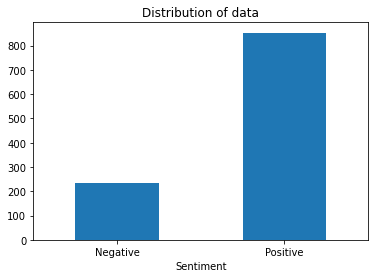

In [45]:
# Plotting the distribution for dataset.
ax = Final_df.groupby('Sentiment').count()["Bank"].plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [43]:
Final_df.groupby(["Sentiment"]).count()

Sentiment
Negative    233
Positive    853
Name: Bank, dtype: int64

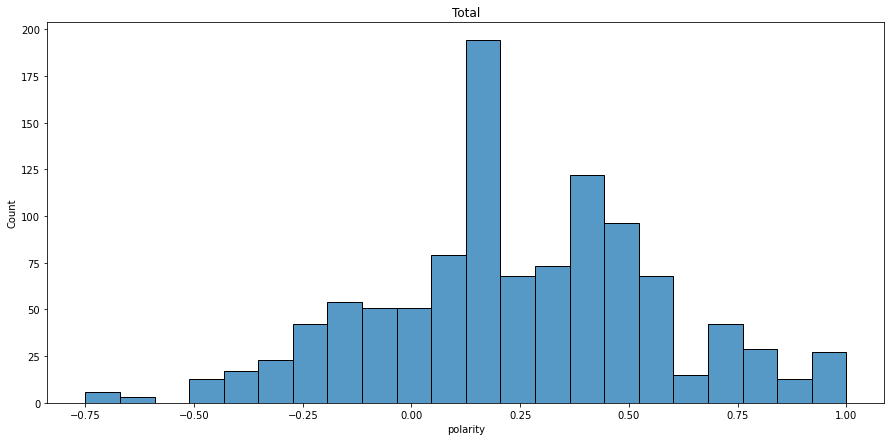

In [24]:
#plot hist
fig = plt.figure(figsize=(15,7))
sns.histplot(Final_df['polarity'])
plt.title("Total")
plt.show()

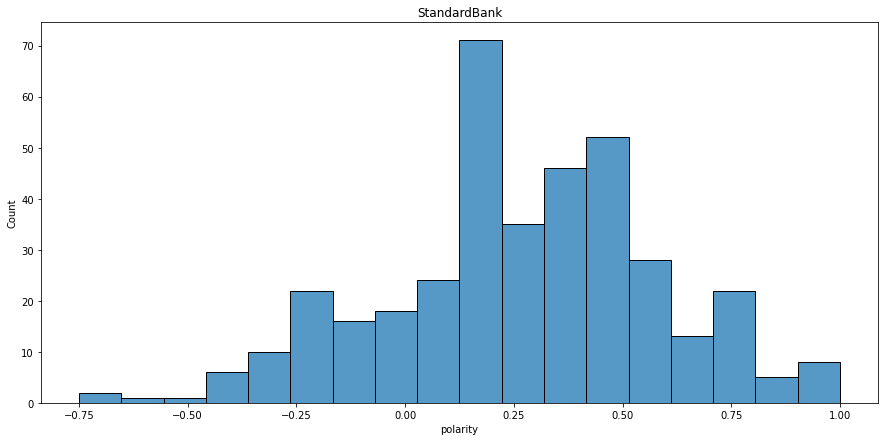

In [25]:
#plot hist
fig = plt.figure(figsize=(15,7))
standard_df = Final_df[(Final_df.Bank=="StandardBank")]
plt.title("StandardBank")
sns.histplot(standard_df['polarity'])
plt.show()

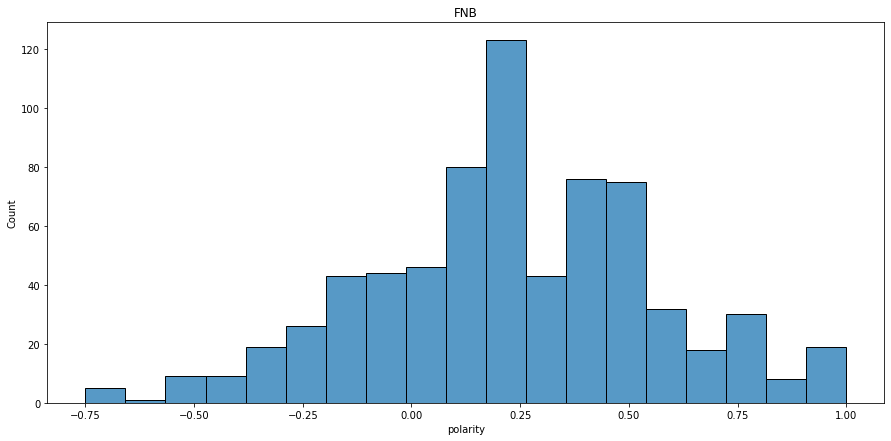

In [26]:
#plot hist
fig = plt.figure(figsize=(15,7))
FNB_df = Final_df[(Final_df.Bank=="FNB")]
plt.title("FNB")
sns.histplot(FNB_df['polarity'])
plt.show()

# Word Cloud

In [ ]:
tweetString = " ".join(list(Final_df["cleaned_tweet"])).lower()
tweetString1 = re.sub(r"standardbankza|standard bank|bank","",tweetString)     #remove bank name

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
Negative_df = Final_df[(Final_df.Sentiment=="Negative")]
NegativeString = " ".join(list(Negative_df["cleaned_tweet"])).lower()
tweetString1 = re.sub(r"standardbankza|standard bank|bank","",tweetString)     #remove bank name

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(Final_df['date'],Final_df['rolling'], color ='r', label='Rolling Mean')
ax.plot(Final_df['date'],Final_df['mean'], color='y', label='Expanding Mean')
#z= plt.plot(Final_df['date'],Final_df["polarity"])

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

#plot data 
ax.scatter(Final_df['date'],Final_df['polarity'], label='Sentiment')
ax.plot(Final_df['date'],Final_df['rolling'], color ='r', label='Rolling Mean')
ax.plot(Final_df['date'],Final_df['mean'], color='y', label='Expanding Mean')
ax.set(title='STD Bank Tweet Sentiment', xlabel='Date', ylabel='Sentiment')

# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

ax.legend(loc='best')
fig.tight_layout()

plt.show()

In [ ]:
Final_df.to_csv("NLP_Bank.csv")